In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Techinical Indicators
import talib as ta
# Plotting graphs
import matplotlib.pyplot as plt
# Machine learning
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

ImportError: libta_lib.so.0: cannot open shared object file: No such file or directory

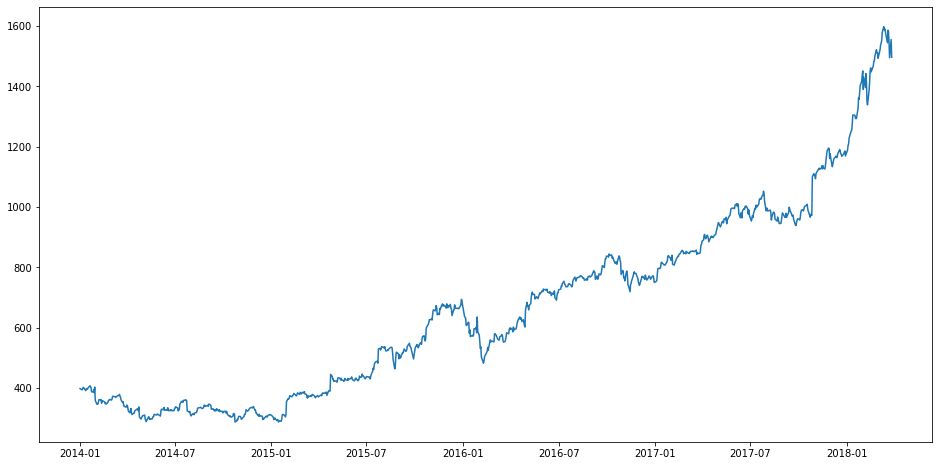

In [239]:
df = pd.read_csv("/tmp/assignment_logistics/DecisionTree_AMZN.csv")
df = df.dropna()
register_matplotlib_converters()
df['Date'] = pd.to_datetime(df.date,format='%m/%d/%y')
df.index = df['Date']
#plot
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price history')

In [240]:
df=df.drop(columns=['Name'])
df=df.drop(columns=['volume'])
df = df.iloc[:,:5]
df.head()

,date,open,low,high,close
Date,,,,,
2014-01-02,1/2/14,398.80,394.02,399.36,397.97
2014-01-03,1/3/14,398.29,396.22,402.71,396.44
2014-01-06,1/6/14,395.85,388.42,397.00,393.63
2014-01-07,1/7/14,395.04,394.29,398.47,398.03
2014-01-08,1/8/14,398.47,396.04,403.00,401.92


### Use 5-days moving average, correlation, relative strength index (RSI), the difference between the open price of yesterday and today, difference close price of yesterday and open price of today, open, high, low, and close price as indicators to make the prediction

In [241]:
df['S_10'] = df['close'].rolling(window=5).mean()
df['Corr'] = df['close'].rolling(window=5).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['close']), timeperiod =300)
df['Open-Close'] = df['open'] - df['close'].shift(1)
df['Open-Open'] = df['open'] - df['open'].shift(1)
df = df.dropna()
df=df.drop(columns=['date'])
X = df.iloc[:,:10]
X.head()

,open,low,high,close,S_10,Corr,RSI,Open-Close,Open-Open
Date,,,,,,,,,
2015-03-13,371.52,366.68,373.99,370.580,371.852,0.409764,49.020306,-2.720,2.70
2015-03-16,370.38,366.72,373.94,373.350,370.810,-0.588987,49.121463,-0.200,-1.14
2015-03-17,371.11,369.64,374.50,371.920,371.292,-0.685917,49.071028,-2.240,0.73
2015-03-18,369.97,366.70,375.99,375.135,373.045,0.570245,49.188710,-1.950,-1.14
2015-03-19,373.87,372.19,377.11,373.240,372.845,0.472215,49.121584,-1.265,3.90


### If the tomorrow's closing price is higher than today's closing price, buy the stock, else sell it.

In [242]:
y = np.where (df['close'].shift(-1) > df['close'],1,-1)

### Split the dataset into a training dataset and test dataset. Use 70% data to train and 30% to test. To do this, create a split variable which will divide the data frame in a 70-30 ratio. 

In [243]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### start the logistic regression LogisticRegression function and fit the model on the training datasset.

In [244]:
model = LogisticRegression(solver='lbfgs',max_iter=500)
model = model.fit (X_train,y_train)

### Check the co-efficients

In [245]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,open,[-0.03266615516899324]
1,low,[0.01652471006645189]
2,high,[0.023909817841745756]
3,close,[-0.026742651893443603]
4,S_10,[0.019361504329346118]
5,Corr,[-0.18110612682047766]
6,RSI,[-0.00028921167064822987]
7,Open-Close,[0.02778023127747297]
8,Open-Open,[0.007748767916931308]


### Evaluate Class Probabilities. Calculate the probabilities of the class for the test dataset using "predict_proba" function.

In [246]:
probability = model.predict_proba(X_test)
print (probability)

[[0.41937027 0.58062973]
 [0.43529957 0.56470043]
 [0.29797694 0.70202306]
 [0.48506487 0.51493513]
 [0.51172936 0.48827064]
 [0.50823561 0.49176439]
 [0.42244824 0.57755176]
 [0.35156637 0.64843363]
 [0.35807761 0.64192239]
 [0.40750746 0.59249254]
 [0.47899847 0.52100153]
 [0.46556927 0.53443073]
 [0.39906711 0.60093289]
 [0.45683014 0.54316986]
 [0.42804326 0.57195674]
 [0.45498178 0.54501822]
 [0.35077769 0.64922231]
 [0.34336148 0.65663852]
 [0.43605227 0.56394773]
 [0.47632833 0.52367167]
 [0.47646547 0.52353453]
 [0.4326628  0.5673372 ]
 [0.48657424 0.51342576]
 [0.46036068 0.53963932]
 [0.48573895 0.51426105]
 [0.4309025  0.5690975 ]
 [0.42312253 0.57687747]
 [0.45833574 0.54166426]
 [0.42923033 0.57076967]
 [0.44722719 0.55277281]
 [0.41368963 0.58631037]
 [0.56827241 0.43172759]
 [0.50968897 0.49031103]
 [0.31428139 0.68571861]
 [0.39185017 0.60814983]
 [0.56696697 0.43303303]
 [0.22121573 0.77878427]
 [0.32075764 0.67924236]
 [0.46693746 0.53306254]
 [0.47358023 0.52641977]


### Predict Class Labels. Now predict the class labels using predict function for the test dataset.

In [247]:
predicted = model.predict(X_test)

### Printing "predicted" variable, observervation is that the classifier is predicting 1, when the probability in the second column of variable "probability" is greater than 0.5. When the probability in the second column is less than 0.5, then the classifier is predicting -1.

In [248]:
print (predicted)

[ 1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [249]:
### Evaluate The Model. The Confusion Matrix is used to describe the performance of classification model on a set of test dataset for which the true values are known. 


In [250]:
print (metrics.confusion_matrix(y_test, predicted))

[[ 10  90]
 [  9 121]]


### Classification Report is another method to examine the performance of classification model.

In [251]:
print (metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.53      0.10      0.17       100
           1       0.57      0.93      0.71       130

    accuracy                           0.57       230
   macro avg       0.55      0.52      0.44       230
weighted avg       0.55      0.57      0.47       230



### In the above matrix, The f1-score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall. The support is the number of samples of the true response that lies in that class.

### Check the model accuracy

In [252]:
print (model.score(X_test,y_test))

0.5695652173913044


### Build Trading Strategy Using The Model. Predict the signal to buy (1) or sell (-1) and calculate. Next, Calculate the cumulative strategy return based on the signal predicted by the model in the test dataset. Plot the cumulative returns.

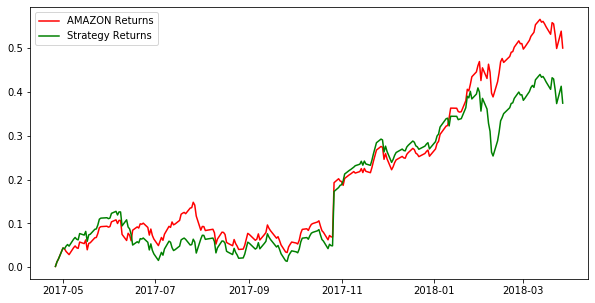

In [253]:
df['Predicted_Signal'] = model.predict(X)
df['AMAZON_returns'] = np.log(df['close']/df['close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['AMAZON_returns'])
df['Startegy_returns'] = df['AMAZON_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'AMAZON Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()